In [1]:
import pandas as pd 
import numpy as np

In [2]:
orders_df= pd.read_csv('order_details.csv',parse_dates=['order_time'])
orders_df.head()
##profile the data
orders_df.info()

C:\Users\hussien\AppData\Local\Temp\ipykernel_18904\2758371042.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  orders_df= pd.read_csv('order_details.csv',parse_dates=['order_time'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12234 entries, 0 to 12233
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12234 non-null  int64         
 1   order_id          12234 non-null  int64         
 2   order_date        12234 non-null  object        
 3   order_time        12234 non-null  datetime64[ns]
 4   item_id           12097 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 478.0+ KB


In [3]:
orders_df.dropna(inplace=True)

##joining menu

In [4]:
menu_df=pd.read_csv('menu_items.csv')

In [5]:
menu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   menu_item_id  32 non-null     int64  
 1   item_name     32 non-null     object 
 2   category      32 non-null     object 
 3   price         32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
order_item_df=orders_df.merge(menu_df,how='left',left_on='item_id',right_on='menu_item_id').drop('menu_item_id',axis=1)
order_item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12097 entries, 0 to 12096
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_details_id  12097 non-null  int64         
 1   order_id          12097 non-null  int64         
 2   order_date        12097 non-null  object        
 3   order_time        12097 non-null  datetime64[ns]
 4   item_id           12097 non-null  float64       
 5   item_name         12097 non-null  object        
 6   category          12097 non-null  object        
 7   price             12097 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 756.2+ KB


In [7]:
order_item_df['item_id']=order_item_df['item_id'].astype(int)

##adding tax and total_revenues columns

In [8]:
order_item_df['sales_tax']=(order_item_df['price']*0.8).round(2)

In [9]:
order_item_df['revenue']=order_item_df['sales_tax']+order_item_df['price']

In [10]:
order_item_df

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price,sales_tax,revenue
0,1,1,1/1/23,2025-05-15 11:38:36,109,Korean Beef Bowl,Asian,17.95,14.36,32.31
1,2,2,1/1/23,2025-05-15 11:57:40,108,Tofu Pad Thai,Asian,14.50,11.60,26.10
2,3,2,1/1/23,2025-05-15 11:57:40,124,Spaghetti,Italian,14.50,11.60,26.10
3,4,2,1/1/23,2025-05-15 11:57:40,117,Chicken Burrito,Mexican,12.95,10.36,23.31
4,5,2,1/1/23,2025-05-15 11:57:40,129,Mushroom Ravioli,Italian,15.50,12.40,27.90
...,...,...,...,...,...,...,...,...,...,...
12092,12230,5369,3/31/23,2025-05-15 22:05:04,109,Korean Beef Bowl,Asian,17.95,14.36,32.31
12093,12231,5369,3/31/23,2025-05-15 22:05:04,129,Mushroom Ravioli,Italian,15.50,12.40,27.90
12094,12232,5369,3/31/23,2025-05-15 22:05:04,120,Steak Torta,Mexican,13.95,11.16,25.11
12095,12233,5369,3/31/23,2025-05-15 22:05:04,122,Chips & Salsa,Mexican,7.00,5.60,12.60


##analyze the best and the worst saleS_ITEM


<Axes: ylabel='item_name'>

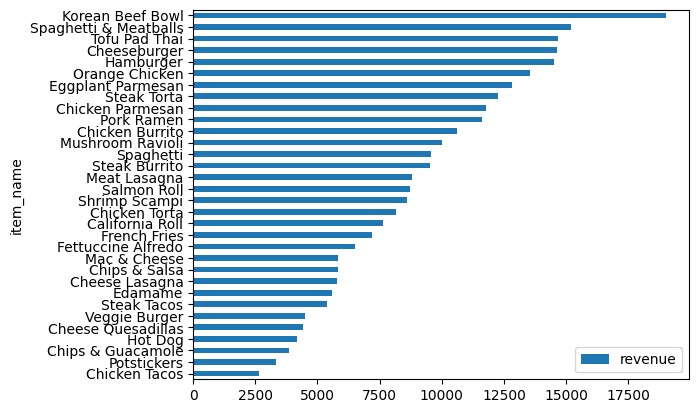

In [13]:
order_item_df.groupby('item_name').agg({'revenue':'sum'}).sort_values('revenue').plot.barh()

<Axes: ylabel='item_name'>

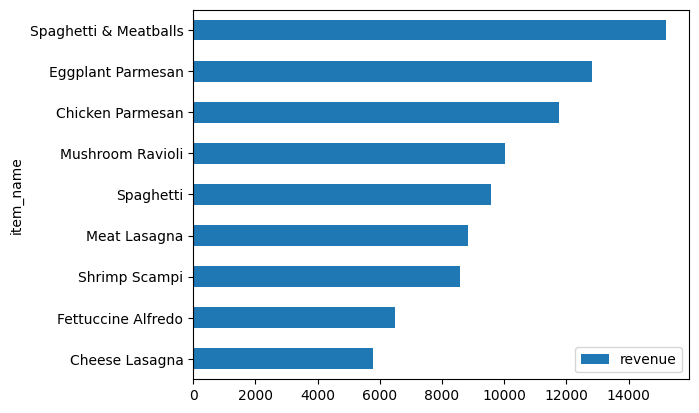

In [21]:
order_item_df.query("category=='Italian'").groupby('item_name').agg({'revenue':'sum'}).sort_values('revenue').plot.barh()

## Analyzing busiest time

C:\Users\hussien\AppData\Local\Temp\ipykernel_18904\4036878964.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  order_item_df.set_index('order_time').resample("M")['revenue'].sum().plot()
c:\Users\hussien\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1567: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: xlabel='order_time'>

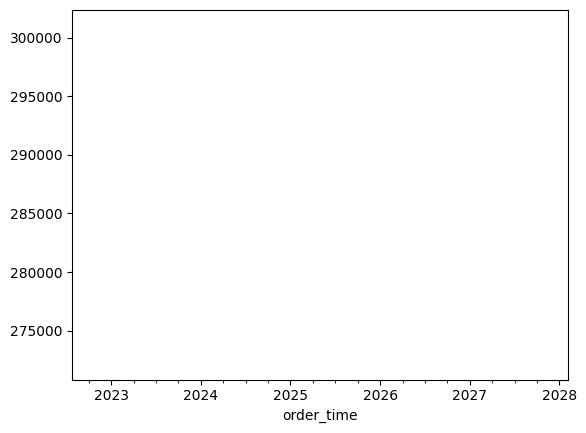

In [26]:
order_item_df.set_index('order_time').resample("M")['revenue'].sum().plot()